## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

from IPython.display import display

%matplotlib inline


## Carregando os dados

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Overview dos dados 

In [3]:
df.head()

Timestamp  Temperature  Dew Point  Surface Albedo  Pressure  \
0  2019-01-01 00:00:00         12.5        6.9            0.21      1005   
1  2019-01-01 00:10:00         12.3        6.9            0.21      1005   
2  2019-01-01 00:20:00         12.1        6.9            0.21      1005   
3  2019-01-01 00:30:00         12.0        6.9            0.21      1005   
4  2019-01-01 00:40:00         11.8        6.9            0.21      1005   

   Wind Direction  Wind Speed  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
0             121         1.0             0             0             0   
1             122         1.0             0             0             0   
2             124         1.0             0             0             0   
3             125         1.0             0             0             0   
4             126         1.0             0             0             0   

   Fill Flag  Ozone  Cloud Type  Solar Zenith Angle  Precipitable Water  \
0          0  0.258           1              173.92                 1.4   
1          0  0.258           1              171.79                 1.3   
2          0  0.258           1              169.59                 1.3   
3          0  0.258           1              167.37                 1.3   
4          0  0.258           1              165.13                 1.3   

   Relative Humidity  
0              68.82  
1              69.73  
2              70.65  
3              71.11  
4              71.91

In [4]:
df.shape

(210240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           210240 non-null  object 
 1   Temperature         210240 non-null  float64
 2   Dew Point           210240 non-null  float64
 3   Surface Albedo      210240 non-null  float64
 4   Pressure            210240 non-null  int64  
 5   Wind Direction      210240 non-null  int64  
 6   Wind Speed          210240 non-null  float64
 7   Clearsky DHI        210240 non-null  int64  
 8   Clearsky DNI        210240 non-null  int64  
 9   Clearsky GHI        210240 non-null  int64  
 10  Fill Flag           210240 non-null  int64  
 11  Ozone               210240 non-null  float64
 12  Cloud Type          210240 non-null  int64  
 13  Solar Zenith Angle  210240 non-null  float64
 14  Precipitable Water  210240 non-null  float64
 15  Relative Humidity   210240 non-nul

In [6]:
df.describe()

Temperature      Dew Point  Surface Albedo       Pressure  \
count  210240.000000  210240.000000   210240.000000  210240.000000   
mean       26.795495      13.447805        0.211623     996.856141   
std         8.639162      10.234861        0.020889       7.226820   
min         1.000000     -12.400000        0.170000     978.000000   
25%        20.800000       4.900000        0.200000     990.000000   
50%        27.300000      13.100000        0.200000     997.000000   
75%        32.200000      24.400000        0.230000    1003.000000   
max        48.900000      29.100000        0.260000    1013.000000   

       Wind Direction     Wind Speed   Clearsky DHI   Clearsky DNI  \
count   210240.000000  210240.000000  210240.000000  210240.000000   
mean       209.095453       1.918037      96.720681     225.098992   
std        101.616108       1.194954     120.334380     277.920322   
min          0.000000       0.000000       0.000000       0.000000   
25%        109.000000       1.100000       0.000000       0.000000   
50%        248.000000       1.500000       0.000000       0.000000   
75%        293.000000       2.500000     194.000000     486.000000   
max        360.000000       9.500000     603.000000    1008.000000   

        Clearsky GHI      Fill Flag          Ozone     Cloud Type  \
count  210240.000000  210240.000000  210240.000000  210240.000000   
mean      249.938537       0.288699       0.268813       2.513604   
std       325.049751       1.052178       0.015632       3.093565   
min         0.000000       0.000000       0.217000       0.000000   
25%         0.000000       0.000000       0.259000       0.000000   
50%         0.000000       0.000000       0.270000       1.000000   
75%       533.000000       0.000000       0.279000       6.000000   
max      1053.000000       5.000000       0.351000       9.000000   

       Solar Zenith Angle  Precipitable Water  Relative Humidity  
count       210240.000000       210240.000000      210240.000000  
mean            89.745758            3.377582          53.364443  
std             42.852632            2.261960          29.692608  
min              2.210000            0.300000           4.100000  
25%             53.140000            1.500000          25.540000  
50%             89.400000            2.500000          51.210000  
75%            126.440000            5.700000          80.820000  
max            177.950000            8.900000         100.000000

In [7]:
df.nunique()

Timestamp             210240
Temperature              480
Dew Point                409
Surface Albedo            10
Pressure                  36
Wind Direction           361
Wind Speed                94
Clearsky DHI             583
Clearsky DNI             990
Clearsky GHI            1044
Fill Flag                  4
Ozone                    135
Cloud Type                 9
Solar Zenith Angle     17466
Precipitable Water        87
Relative Humidity       9582
dtype: int64

## Limpeza, tratamentos e feature engineering

In [8]:
df.isnull().sum()

# Está limpo

Timestamp             0
Temperature           0
Dew Point             0
Surface Albedo        0
Pressure              0
Wind Direction        0
Wind Speed            0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Fill Flag             0
Ozone                 0
Cloud Type            0
Solar Zenith Angle    0
Precipitable Water    0
Relative Humidity     0
dtype: int64

In [9]:
# Vamos colocar a data como index e mudar o seu tipo para datetime

df = df.set_index('Timestamp')
df.index = pd.to_datetime(df.index)


In [10]:
df.tail()

Temperature  Dew Point  Surface Albedo  Pressure  \
Timestamp                                                               
2022-12-31 23:10:00          6.9        5.8            0.21      1009   
2022-12-31 23:20:00          6.8        5.8            0.21      1009   
2022-12-31 23:30:00          6.8        5.8            0.21      1009   
2022-12-31 23:40:00          6.8        5.6            0.21      1009   
2022-12-31 23:50:00          6.8        5.6            0.21      1009   

                     Wind Direction  Wind Speed  Clearsky DHI  Clearsky DNI  \
Timestamp                                                                     
2022-12-31 23:10:00              54         1.2             0             0   
2022-12-31 23:20:00              54         1.2             0             0   
2022-12-31 23:30:00              55         1.1             0             0   
2022-12-31 23:40:00              55         1.1             0             0   
2022-12-31 23:50:00              56         1.1             0             0   

                     Clearsky GHI  Fill Flag  Ozone  Cloud Type  \
Timestamp                                                         
2022-12-31 23:10:00             0          0  0.279           4   
2022-12-31 23:20:00             0          0  0.279           7   
2022-12-31 23:30:00             0          0  0.279           7   
2022-12-31 23:40:00             0          0  0.279           7   
2022-12-31 23:50:00             0          0  0.280           7   

                     Solar Zenith Angle  Precipitable Water  Relative Humidity  
Timestamp                                                                       
2022-12-31 23:10:00              173.77                 1.8              92.63  
2022-12-31 23:20:00              175.77                 1.8              93.26  
2022-12-31 23:30:00              177.31                 1.8              93.26  
2022-12-31 23:40:00              177.36                 1.8              91.95  
2022-12-31 23:50:00              175.87                 1.8              91.95

In [11]:
# Criando as features antes de separar, faz de uma  vez só


def criacao_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    
    return df

In [12]:
df = criacao_features(df)

In [13]:
# Criando uma feature que indique se é noite ou não

df['dia_noite'] = np.where((df['hour'] > 6) & (df['hour'] <= 18), 1, 0)

## Análise Exploratória com dataviz

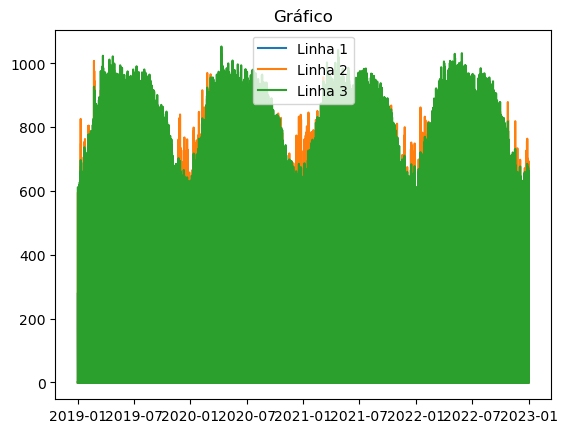

In [14]:
# Plotando as três curvas dos nossos targets para ver como se comportam ao lonfo dos anos

plt.plot(df.index, df['Clearsky DHI'], label='Linha 1')
plt.plot(df.index, df['Clearsky DNI'], label='Linha 2')
plt.plot(df.index, df['Clearsky GHI'], label='Linha 3')

plt.legend()
plt.title('Gráfico')

plt.show()


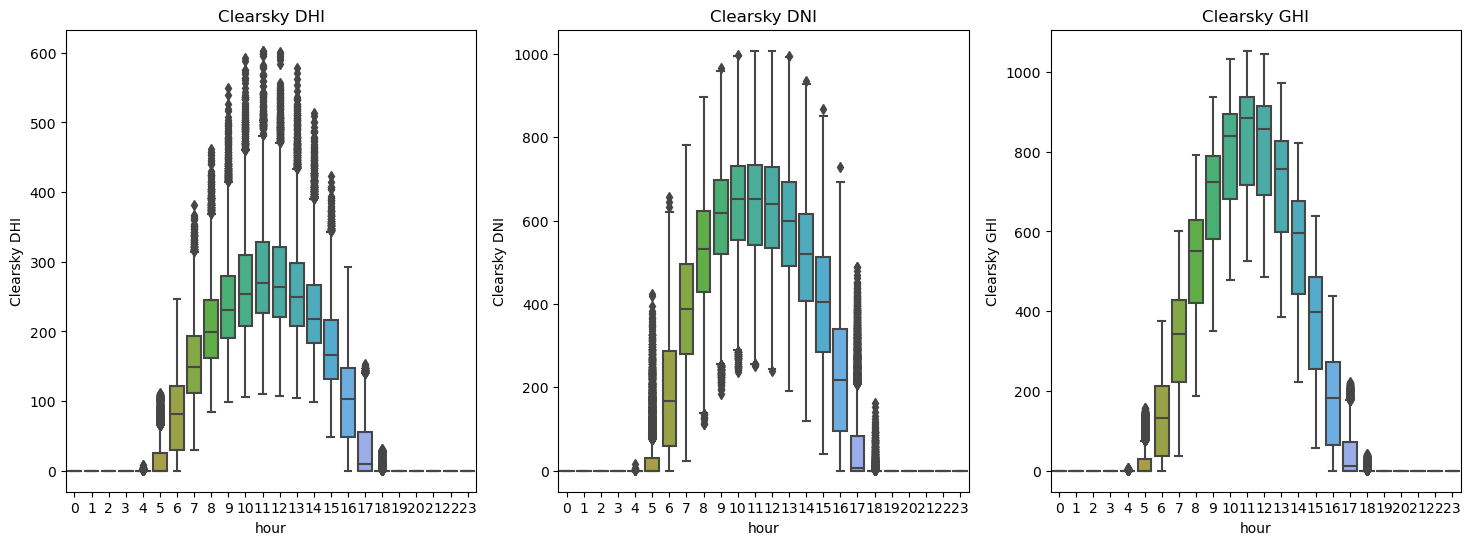

In [15]:
# Visualizando com boxplot a variação da incidência solar pelas horas do dia


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Subplot 1
axes[0].set_title('Clearsky DHI')
sns.boxplot(data=df, x='hour', y='Clearsky DHI', ax=axes[0])

# Subplot 2
axes[1].set_title('Clearsky DNI')
sns.boxplot(data=df, x='hour', y='Clearsky DNI', ax=axes[1])

# Subplot 3
axes[2].set_title('Clearsky GHI')
sns.boxplot(data=df, x='hour', y='Clearsky GHI', ax=axes[2])

plt.show()

<Axes: title={'center': 'Clearsky GHI (month)'}, xlabel='month', ylabel='Clearsky GHI'>

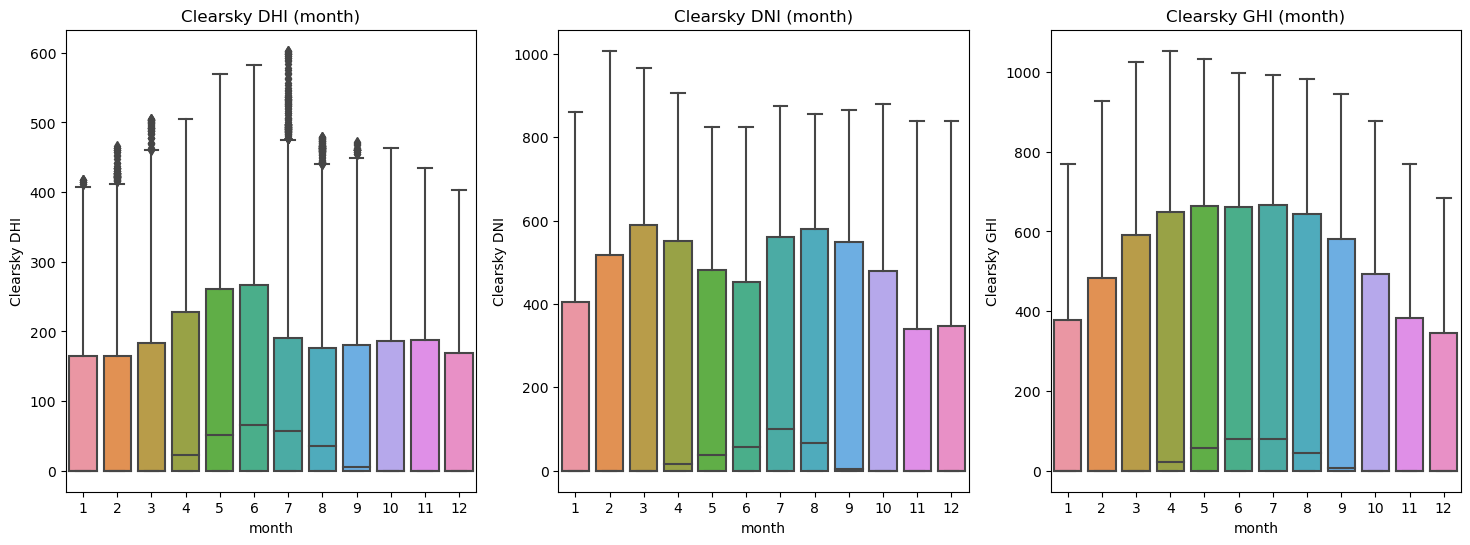

In [16]:
# Agora por mês

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].set_title('Clearsky DHI (month)')
sns.boxplot(data=df, x='month', y='Clearsky DHI', ax=axes[0])

axes[1].set_title('Clearsky DNI (month)')
sns.boxplot(data=df, x='month', y='Clearsky DNI', ax=axes[1])

axes[2].set_title('Clearsky GHI (month)')
sns.boxplot(data=df, x='month', y='Clearsky GHI', ax=axes[2])

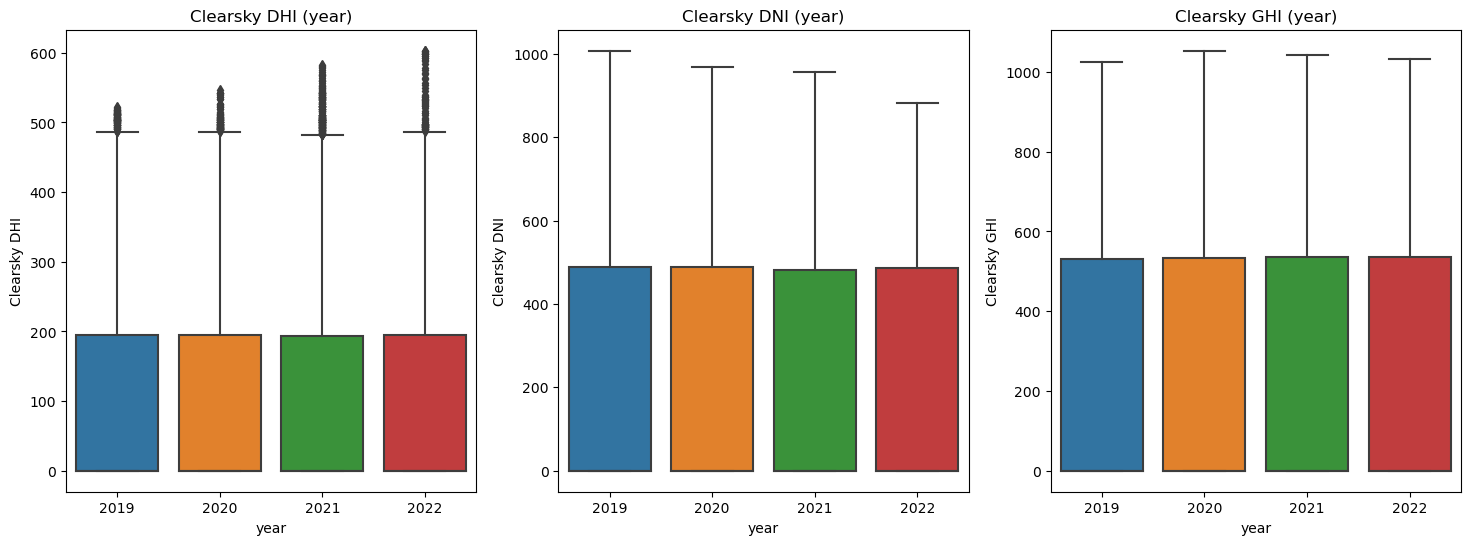

In [17]:
# Por ano

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].set_title('Clearsky DHI (year)')
sns.boxplot(data=df, x='year', y='Clearsky DHI', ax=axes[0])

axes[1].set_title('Clearsky DNI (year)')
sns.boxplot(data=df, x='year', y='Clearsky DNI', ax=axes[1])

axes[2].set_title('Clearsky GHI (year)')
sns.boxplot(data=df, x='year', y='Clearsky GHI', ax=axes[2])

plt.show()

In [18]:
# Vamos criar um função para visualizar as features que nos interessam

def plot_histograms(dataset, columns):
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))
    fig.tight_layout(pad=5.0)
    
    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2
        
        sns.histplot(data=dataset, x=column, ax=axes[row, col])
        
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Frequência')
        axes[row, col].set_title(f'Histograma de {column}')
    
    plt.tight_layout()
    display(fig)
    plt.close(fig)



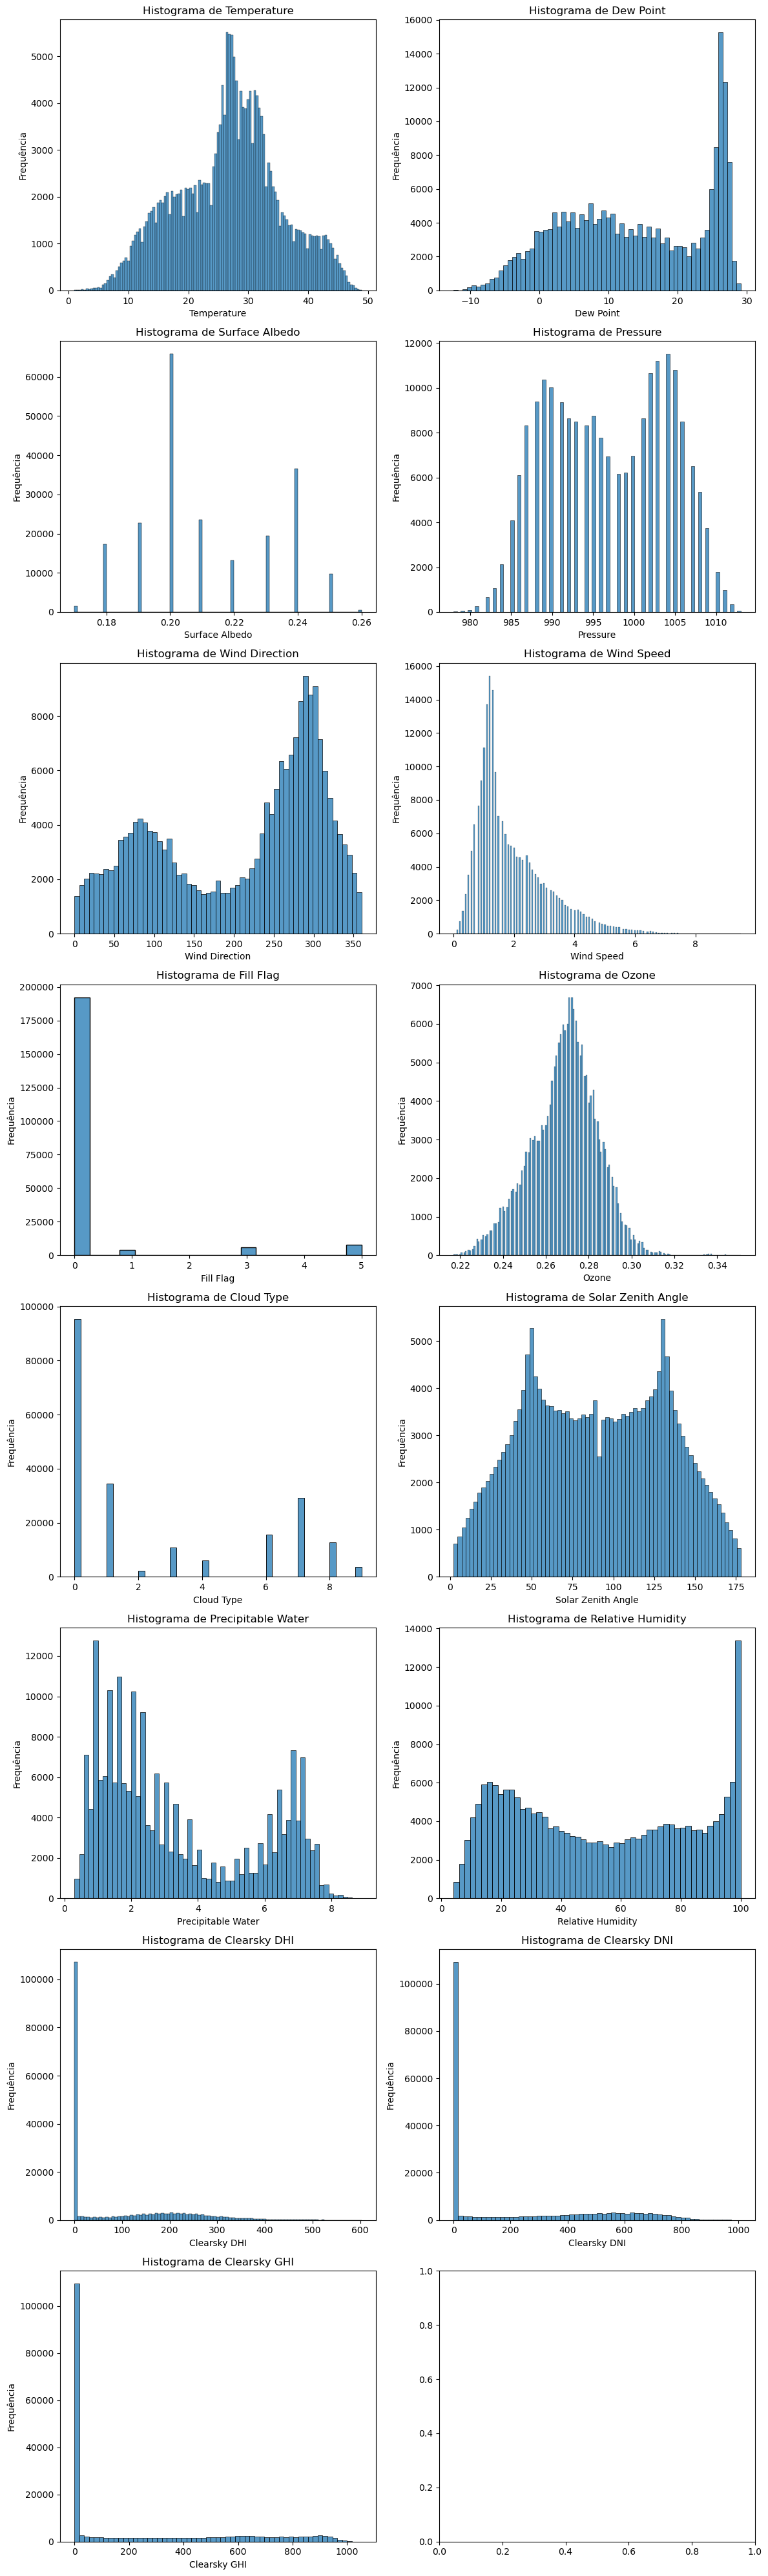

In [19]:

colunas_interessantes = ['Temperature', 'Dew Point', 'Surface Albedo', 'Pressure',
           'Wind Direction', 'Wind Speed', 'Fill Flag', 'Ozone', 'Cloud Type',
            'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity', 'Clearsky DHI', 'Clearsky DNI' ,'Clearsky GHI']


plot_histograms(df, colunas_interessantes)


### Principais insights:


Através dos gráficos podemos inferir:

- Temperatura: A maior concentração das frequências está na faixa de 25 a 30 graus Celsius.

- Superfíce Albedo: A mais frequente é 0,2.

- A pressão do local está marjoritariamente entre 985 e 1005 hPca

- Direção do vento: A maior frequência é de 300 graus

- Velocidade do vento: Apresenta uma distribuição assimétrica para a esquerda.

- Fill flag: Praticamente todos 0.

- Ozônio: Segue praticamente uma distribuição normal, sendo a média de 0,27.

- Tipo de nuvem: Bem distribuido entre os tipos, sendo a maioria do tipo 0.

- Ângulo do zenith solar: Essa é a feature que mais influência na predição de energia solar. Tem aspecto de distribuição bimodal.

- Precipitação da agua: Se concetra em dois picos, proximos a marcação de 2 e de 7 mm.

- Umidade relativa: TEm uma distribuição bem uniforme, exceto pela medida de 100% que é quando o ar, na temperatura em que se encontra, está saturado com água, não sendo mais capaz de absorver este elemento.

- Clearsky DHI, DNI e GHI: Seguem uma distribuição muito parecida, e claro, está em 0 durante os períodos noturno.



### Análise de correlação:

In [45]:
df_selected = df[['Temperature', 'Dew Point', 'Surface Albedo',
                 'Wind Direction', 'Wind Speed', 'Ozone', 'Cloud Type', 'Clearsky DHI',
                 'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity', 'dia_noite']]

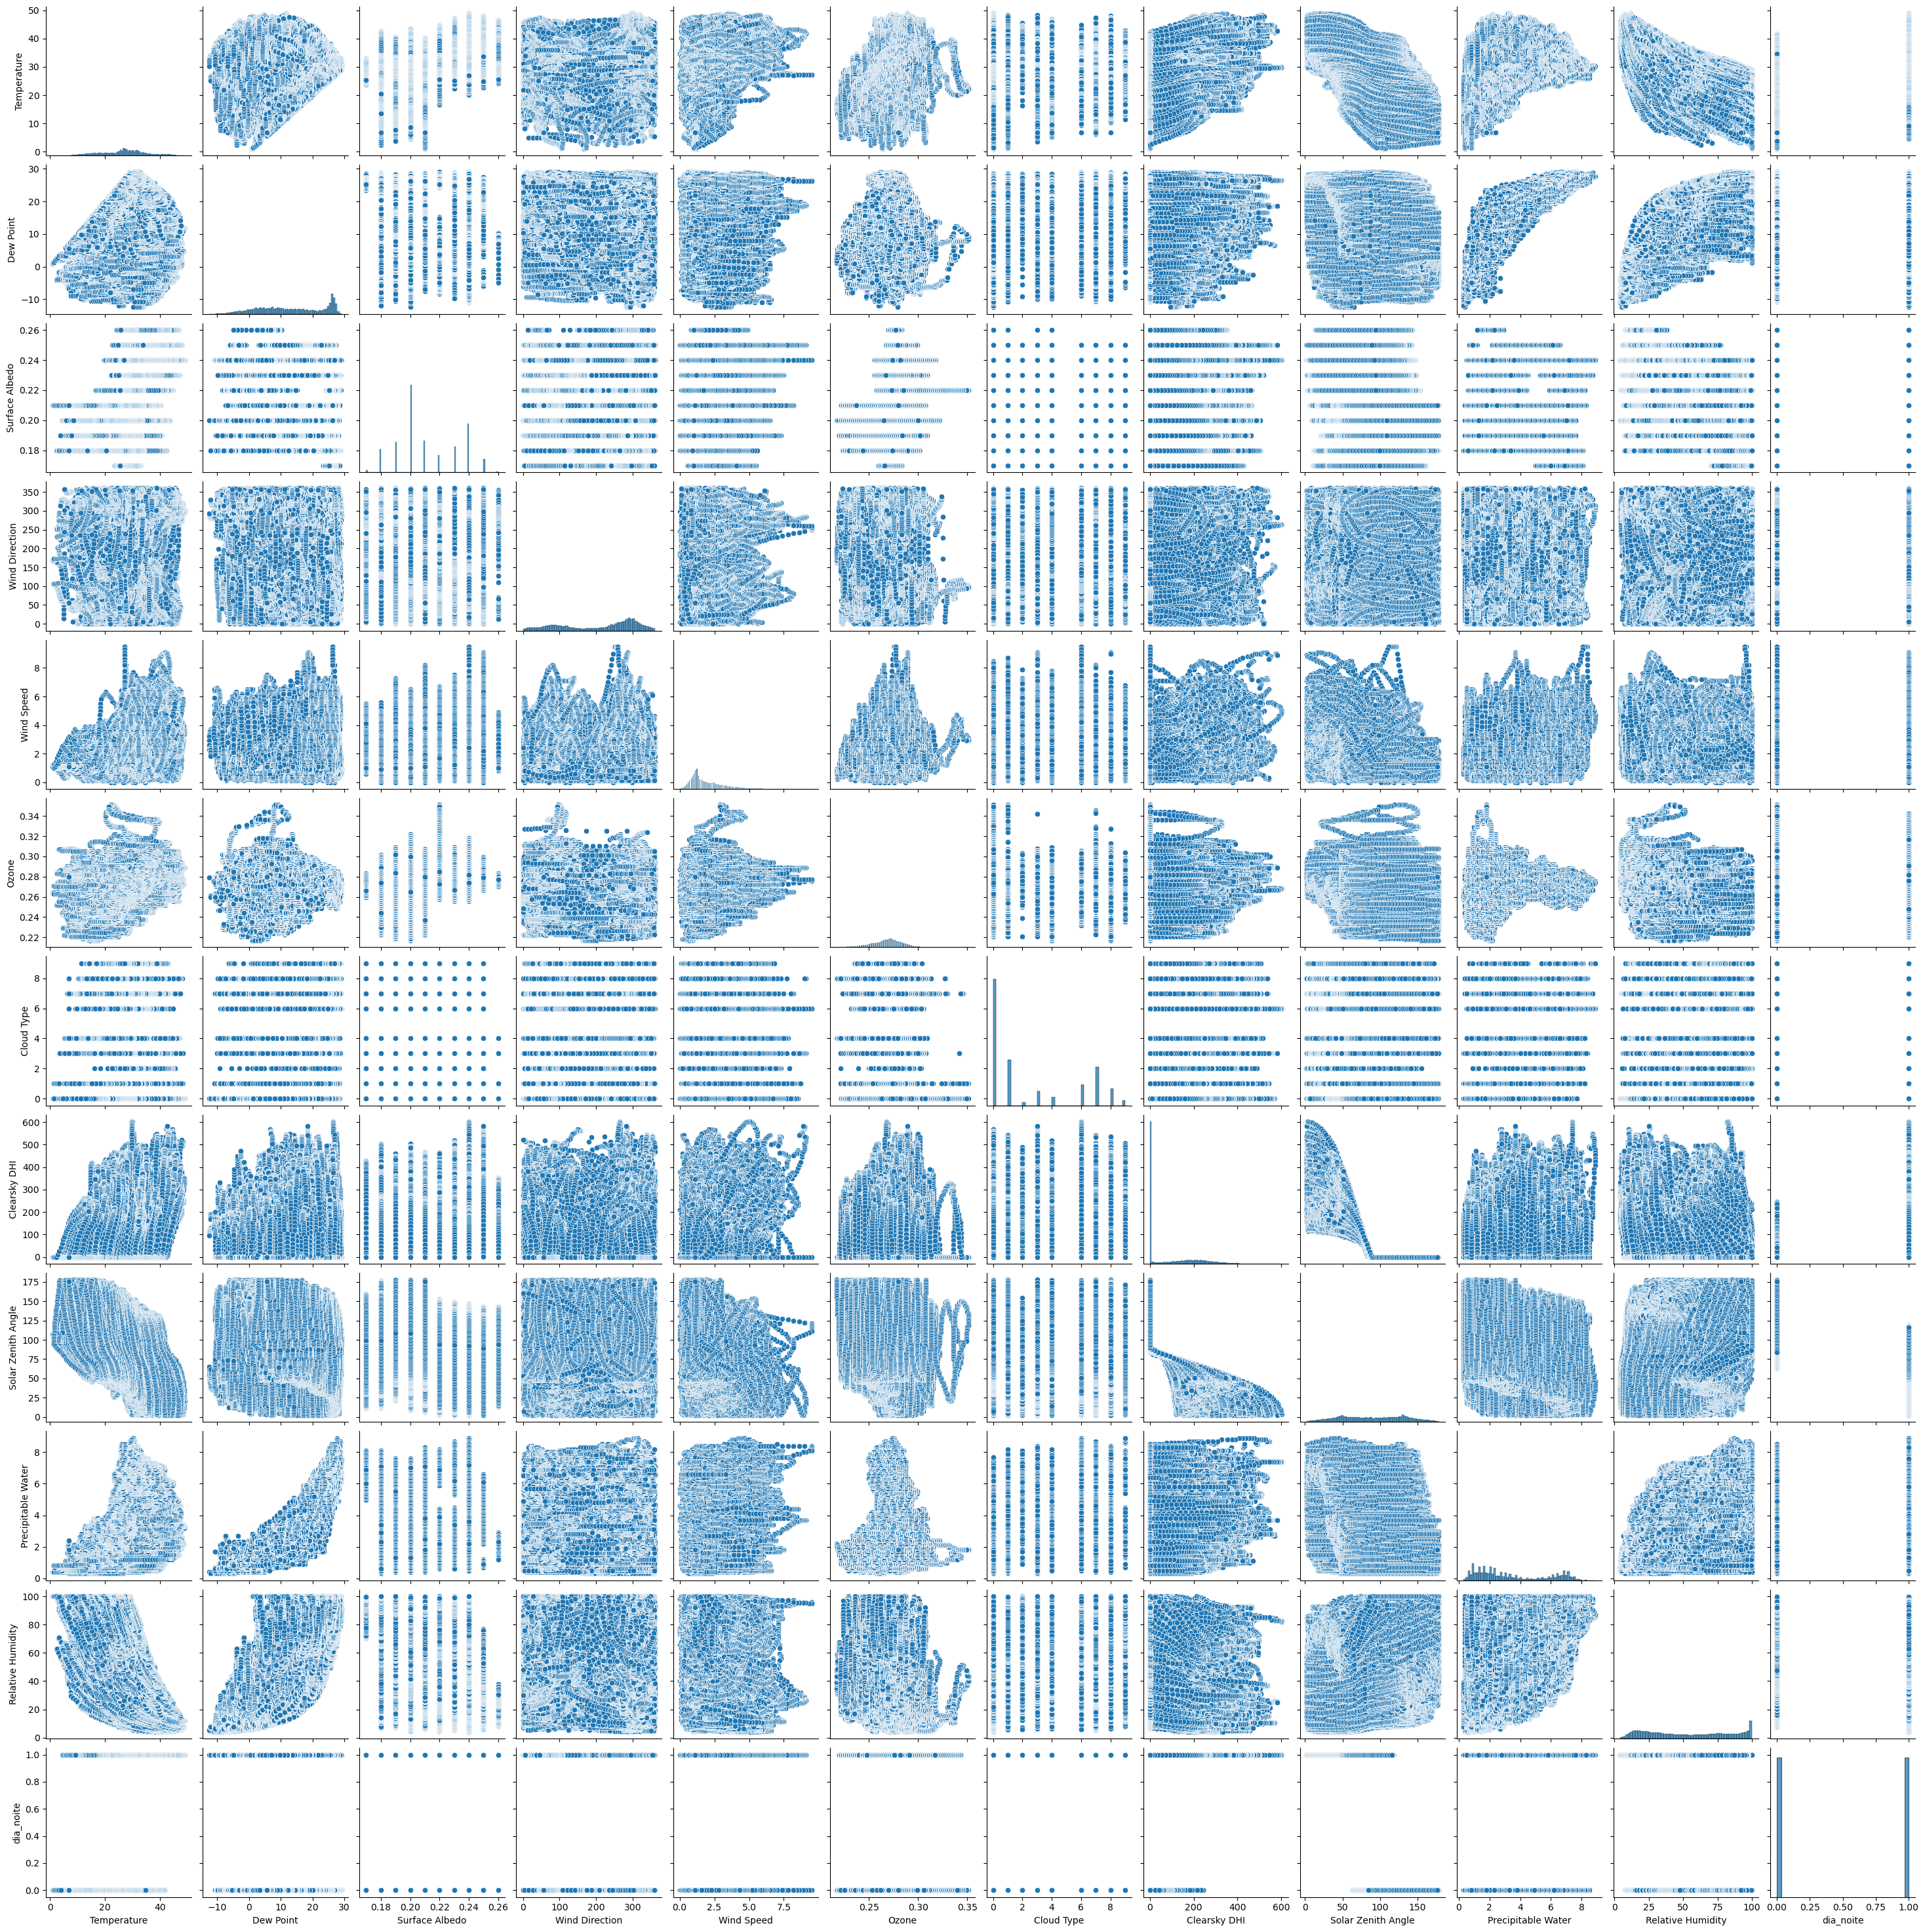

In [46]:
sns.pairplot(df_selected)

## Pre processament dos dados

In [21]:
# Separar em treino e validação por uma data limite, escolhemos 2021-12-31:

train = df.loc[df.index < '2021-12-31']
val = df.loc[df.index >= '2021-12-31']





# Separando as features dos targets

FEATURES =['Temperature', 'Dew Point', 'Surface Albedo', 'Pressure',
           'Wind Direction', 'Wind Speed', 'Fill Flag', 'Ozone', 'Cloud Type',
            'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity', 'hour',
            'dayofweek', 'quarter', 'month', 'year', 'dia_noite']

TARGET = ['Clearsky DHI', 'Clearsky DNI' ,'Clearsky GHI' ]



#Split final


X_train = train[FEATURES]
y_train = train[TARGET]

X_val = val[FEATURES]
y_val = val[TARGET]

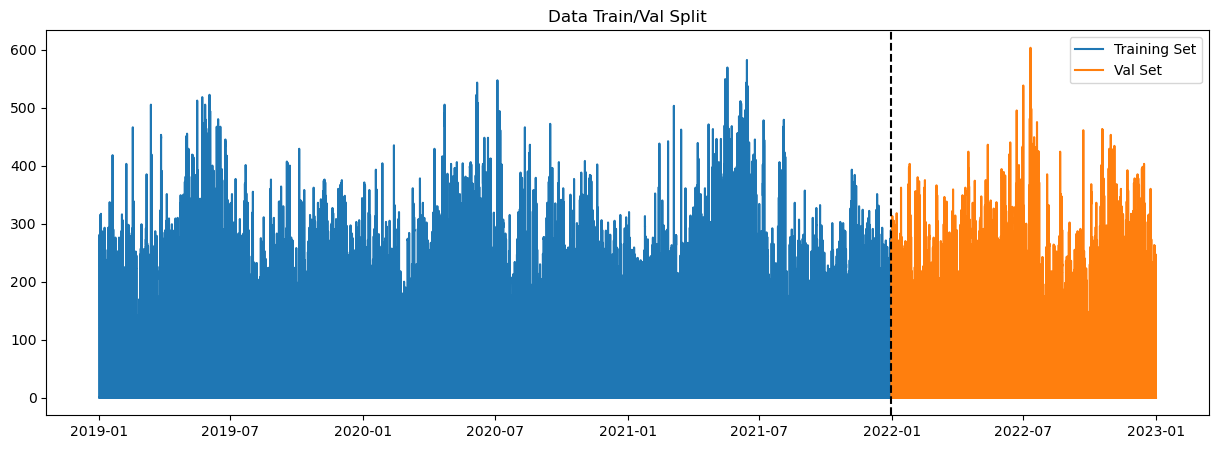

In [22]:
# Vamos ver graficamente como ficou a separação dos dados

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(train.index, train['Clearsky DHI'], label='Training Set')
ax.plot(val.index, val['Clearsky DHI'], label='Val Set')
ax.set_title('Data Train/Val Split')

ax.axvline(np.datetime64('2021-12-31'), color='black', ls='--')
ax.legend(['Training Set', 'Val Set'])
plt.show()


In [23]:
reg = XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth= 4,
                       learning_rate=0.05)


reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=100)

[18:02:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:310.07334	validation_1-rmse:311.41504
[100]	validation_0-rmse:39.66512	validation_1-rmse:45.86107
[200]	validation_0-rmse:36.08190	validation_1-rmse:44.81395
[267]	validation_0-rmse:34.67927	validation_1-rmse:44.92279


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

C:\Users\Lucas Lima\AppData\Local\Temp\ipykernel_6776\1350604482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val[['DHI', 'DNI', 'GHI']] = reg.predict(X_val)
C:\Users\Lucas Lima\AppData\Local\Temp\ipykernel_6776\1350604482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val[['DHI', 'DNI', 'GHI']] = reg.predict(X_val)
C:\Users\Lucas Lima\AppData\Local\Temp\ipykernel_6776\1350604482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

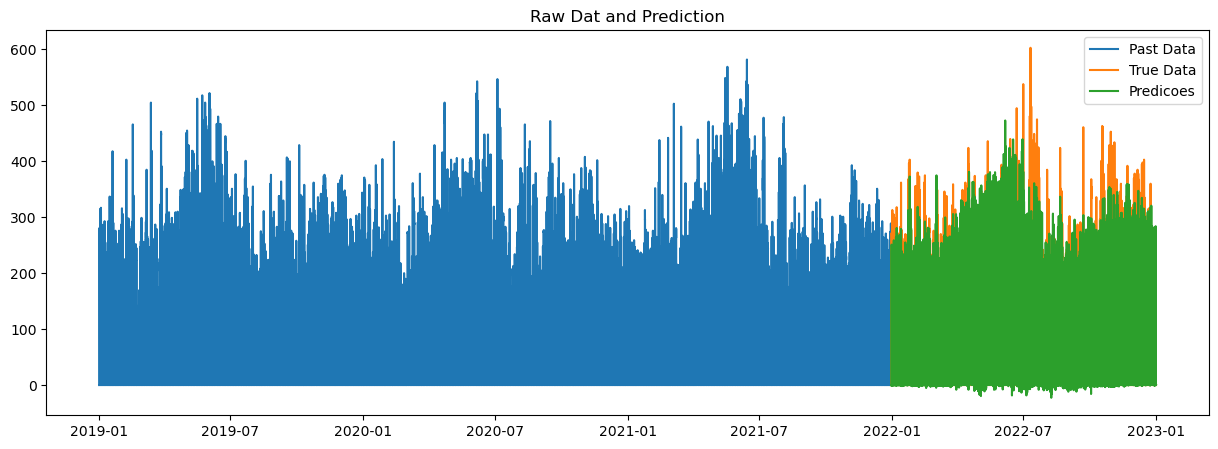

In [24]:
# Vamos ver graficamente a predição


val[['DHI', 'DNI', 'GHI']] = reg.predict(X_val)


fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(train.index, train['Clearsky DHI'], label='Training Set')
ax.plot(val.index, val['Clearsky DHI'], label='Val Set')
ax.plot(val.index, val['DHI'], label='predict')



plt.legend(['Past Data', 'True Data', 'Predicoes'])
ax.set_title('Raw Dat and Prediction')
plt.show()


Notamos que no em dois meses específicos a predição foi muito aquém do real. Vamos tentar descobrir quais são.

In [25]:
from sklearn.metrics import mean_squared_error

score = np.sqrt(mean_squared_error(val['Clearsky GHI'], val['GHI']))

print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 14.34


In [26]:
val['error'] = np.abs(val['Clearsky GHI'] - val['GHI'])
val['date'] = val.index.date
val[['date','error']].groupby(['date']).mean().sort_values(by='error',ascending=False).head(10).reset_index()

C:\Users\Lucas Lima\AppData\Local\Temp\ipykernel_6776\1043293914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['error'] = np.abs(val['Clearsky GHI'] - val['GHI'])
C:\Users\Lucas Lima\AppData\Local\Temp\ipykernel_6776\1043293914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['date'] = val.index.date


date      error
0  2022-07-11  35.144732
1  2022-07-12  25.543945
2  2022-12-26  23.837914
3  2022-12-27  23.172018
4  2022-01-01  22.703702
5  2022-12-23  21.314161
6  2022-06-17  21.113912
7  2022-10-19  20.462829
8  2022-11-18  20.315911
9  2022-01-13  20.304496

O mês 7 e 12 de 2022 são os meses quando há maior erro na predição.

## Fazendo a predicao com dados de teste

In [27]:
# Vamos importar os dados de teste e depois trata-los como fizemos os os de teste.

df_test = pd.read_csv('test.csv')
df_test.head()

Timestamp  Temperature  Dew Point  Surface Albedo  Pressure  \
0  2023-01-01 00:00:00         11.3        1.6            0.21      1006   
1  2023-01-01 00:10:00         11.2        1.6            0.21      1006   
2  2023-01-01 00:20:00         11.1        1.6            0.21      1006   
3  2023-01-01 00:30:00         11.0        1.6            0.21      1006   
4  2023-01-01 00:40:00         10.9        1.2            0.21      1006   

   Wind Direction  Wind Speed  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
0             305         1.2           NaN           NaN           NaN   
1             306         1.2           NaN           NaN           NaN   
2             306         1.2           NaN           NaN           NaN   
3             307         1.2           NaN           NaN           NaN   
4             307         1.2           NaN           NaN           NaN   

   Fill Flag  Ozone  Cloud Type  Solar Zenith Angle  Precipitable Water  \
0          0  0.255           0              173.92                 1.4   
1          0  0.255           0              171.79                 1.4   
2          0  0.255           0              169.59                 1.4   
3          0  0.255           0              167.37                 1.4   
4          0  0.255           0              165.13                 1.4   

   Relative Humidity  
0              51.38  
1              51.72  
2              52.06  
3              52.41  
4              51.34

In [28]:

df_test = df_test.drop(columns=['Clearsky DHI','Clearsky DNI','Clearsky GHI'])


In [29]:
df_test.head()

Timestamp  Temperature  Dew Point  Surface Albedo  Pressure  \
0  2023-01-01 00:00:00         11.3        1.6            0.21      1006   
1  2023-01-01 00:10:00         11.2        1.6            0.21      1006   
2  2023-01-01 00:20:00         11.1        1.6            0.21      1006   
3  2023-01-01 00:30:00         11.0        1.6            0.21      1006   
4  2023-01-01 00:40:00         10.9        1.2            0.21      1006   

   Wind Direction  Wind Speed  Fill Flag  Ozone  Cloud Type  \
0             305         1.2          0  0.255           0   
1             306         1.2          0  0.255           0   
2             306         1.2          0  0.255           0   
3             307         1.2          0  0.255           0   
4             307         1.2          0  0.255           0   

   Solar Zenith Angle  Precipitable Water  Relative Humidity  
0              173.92                 1.4              51.38  
1              171.79                 1.4              51.72  
2              169.59                 1.4              52.06  
3              167.37                 1.4              52.41  
4              165.13                 1.4              51.34

In [30]:
df_test = df_test.set_index('Timestamp')
df_test.index = pd.to_datetime(df_test.index)


df_test = criacao_features(df_test)

In [31]:
df_test['dia_noite'] = np.where((df_test['hour'] > 6) & (df_test['hour'] <= 18), 1, 0)

In [36]:
y_pred = np.round(reg.predict(df_test), 2)

In [37]:
df_pred = pd.DataFrame(y_pred, columns=['Clearsky DHI','Clearsky DNI','Clearsky GHI'])

In [38]:
df_pred

Clearsky DHI  Clearsky DNI  Clearsky GHI
0              0.38         -1.41          0.04
1              0.38         -1.41          0.04
2              0.38         -1.41          0.04
3              0.38         -1.41          0.05
4              0.38         -1.41          0.05
...             ...           ...           ...
52555          0.52         -0.22         -0.56
52556          0.52         -0.22         -0.56
52557          0.52         -0.22         -0.56
52558          0.52         -0.22         -0.56
52559          0.52         -0.22         -0.56

[52560 rows x 3 columns]

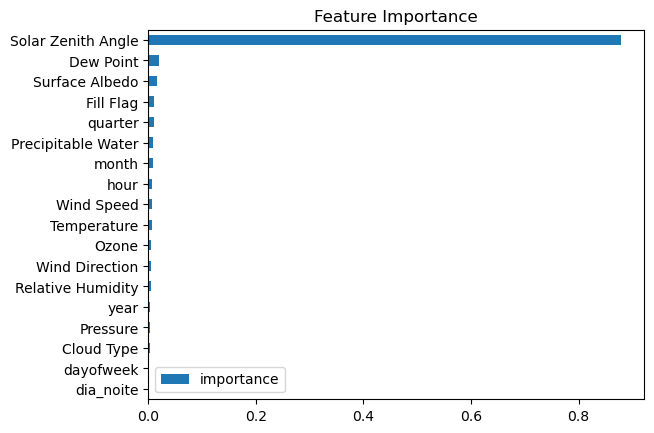

In [39]:
#Vamos ver a importância de cada variavél e plotar um gráfico de barras para visualizar.

fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Podemos ver que a o ângulo zenital solar é a variável mais importante para prever a produção de energia solar .